<a href="https://colab.research.google.com/github/miftahudinfaiz/BDDM/blob/main/BD%26DM_week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Week 11 - K Means Clustering

###Konsep Clustering

**Clustering** adalah sebuah proses untuk mengelompokan data ke dalam beberapa cluster atau kelompok sehingga data dalam satu cluster memiliki tingkat kemiripan yang maksimum dan data antar cluster memiliki kemiripan yang minimum.




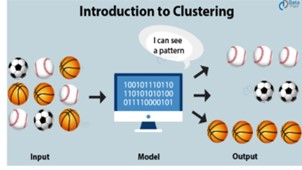


**Metode K-means** merupakan metode clustering yang paling sederhana dan umum. Hal ini dikarenakan K-means mempunyai kemampuan mengelompokkan data dalam jumlah yang cukup besar dengan waktu komputasi yang cepat dan efisien.


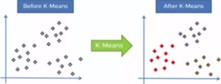


Cara kerja algoritma K-Means Clustering sebagai berikut :

**Langkah 1:** Tentukan berapa banyak cluster k dari dataset yang akan dibagi.

**Langkah 2:** Tetapkan secara acak data k menjadi pusat awal lokasi klaster.

**Langkah 3:** Untuk masing-masing data, temukan pusat cluster terdekat. Dengan demikian berarti masing-masing pusat cluster memiliki sebuah subset dari dataset, sehingga mewakili bagian dari dataset. Oleh karena itu, telah terbentuk cluster k: Cl, C2, C3, ..., Ck .

**Langkah 4:** Untuk masing-masing cluster k, temukan pusat luasan klaster, dan perbarui lokasi dari masing-masing pusat cluster ke nilai baru dari pusat luasan.

**Langkah 5:** Ulangi langkah ke-3 dan ke-5 hingga data-data pada tiap cluster menjadi terpusat atau selesai.

Algoritma K-Means Clustering memiliki kelebihan dan juga kekurangan.

**Kelebihan**

*	Relatif sederhana dan mudah untuk diterapkan.
*	Dapat diskalakan untuk dataset dalam jumlah besar.
*	Mudah beradaptasi dengan contoh baru.
*	Umum diimplementasikan ke cluster dengan bentuk dan ukuran yang berbeda, seperti cluster elips.

**Kekurangan**

*	Perlu menentukan nilai k secara manual
*	Sangat bergantung pada inisialisasi awal. Jika nilai random untuk inisialisasi kurang baik, maka pengelompokkan yang dihasilkan pun menjadi kurang optimal.
*	Dapat terjadi curse of dimensionality. Masalah ini timbul jika dataset memiliki dimensi yang sangat tinggi
*	K-means mengalami kesulitan mengelompokkan data di mana cluster memiliki ukuran dan kepadatan yang bervariasi.

##Implementasi 1 - Basic Clustering - Data Dummy Make Blobs

###1. Import Library

In [4]:
import numpy as np #used for working with arrays and maths 
import pandas as pd #dataframe 
from matplotlib import pyplot as plt #plotting 
from sklearn.datasets import make_blobs #generate data 
from sklearn.cluster import KMeans #main algorithm

#determining number of clusters 
from sklearn.metrics import silhouette_score

###2. Load Dataset

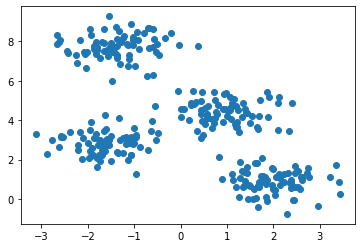

In [5]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) #make blobs() adalah dataset yang dapat dimodelkan oleh K-Means clustering. 
# n samples jumlah data
# centers . jumlah cluster
# cluster std . std cluster
plt.scatter(X[:, 0], X[:, 1])

###3. Determine Number of Clusters

Bagian ini diperlukan untuk menentukan jumlah cluster optimal, pada kasus kali ini jumlah cluster telah diketahui yaitu 4. Namun cara ini cocok untuk diterapkan pada dataset dengan sebaran yang berdekatan.

####Method 1 - Elbow Method

**Metode Elbow** merupakan suatu metode yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluster terbaik dengan cara melihat persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik.

Jika nilai cluster pertama dengan nilai cluster kedua memberikan sudut dalam grafik atau nilainya mengalami penurunan paling besar maka jumlah nilai cluster tersebut yang tepat. Untuk mendapatkan perbandingannya adalah dengan menghitung Sum of Square Error (SSE) dari masing-masing nilai cluster. Karena semakin besar jumlah nilai cluster K, maka nilai SSE akan semakin kecil.

Persamaan SSE=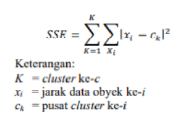

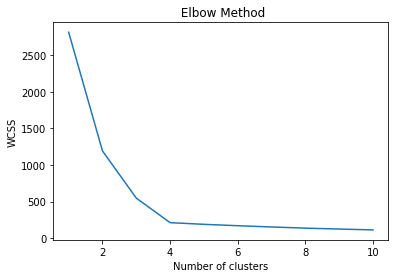

In [8]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X) 
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title(' Elbow Method' )
plt.xlabel('Number of clusters' )
plt.ylabel('WCSS')
plt.show()

####Method 2 - Silhouette Coefficient

**Silhouette Coefficient** digunakan untuk melihat kualitas dan kekuatan cluster, seberapa baik atau buruknya suatu obyek ditempatkan dalam suatu cluster. Metode ini merupakan gabungan dari metode separasi dan kohesi.

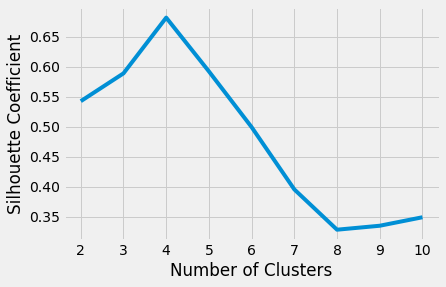

In [11]:
# A list holds the silhouette coefficients for each k 
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient 
for k in range(2, 11):
  kmeans= KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10,	random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

####4. Create Cluster

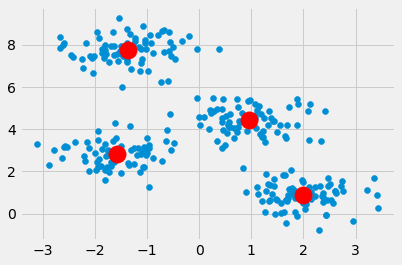

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1]) 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Dari gambar diatas dapat kita lihat bahwa dari 300 data telah ter cluster menjadi 4.

###Implementasi 2 - Mall Customer Segmentation

####1. Import Library

In [14]:
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Determine number of clusters
from sklearn.metrics import silhouette_score

####2. Load Dataset

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/miftahudinfaiz/BDDM/main/Dataset%20files/Mall_Customers.csv")

####3. EDA

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


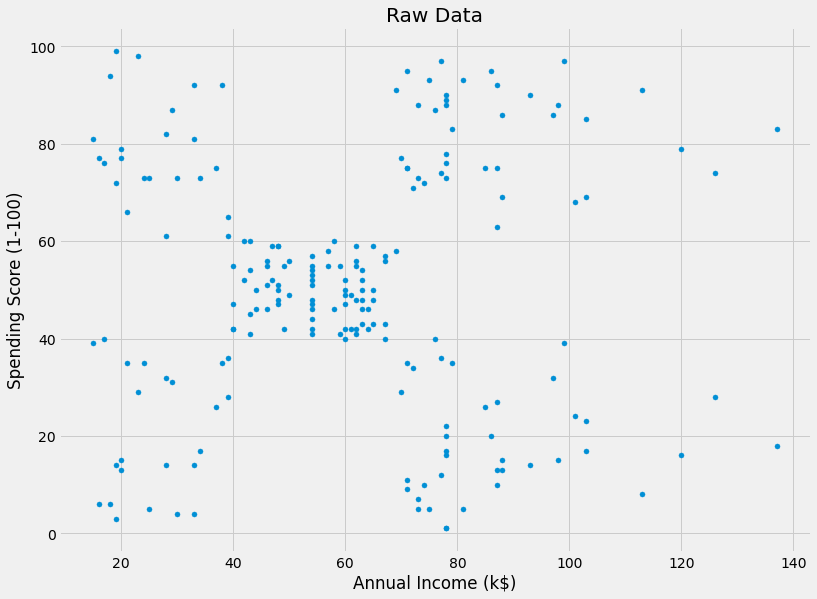

In [19]:
plt.figure(figsize=(12, 9))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], s=25) #Point size is 25
plt.title('Raw Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

####4. Data preprocessing

#####Select Feature

In [20]:
X = np.array(df.iloc[:, [3, 4]])

In [21]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#####Determine Number of Clusters

######Method 1 - Elbow Method

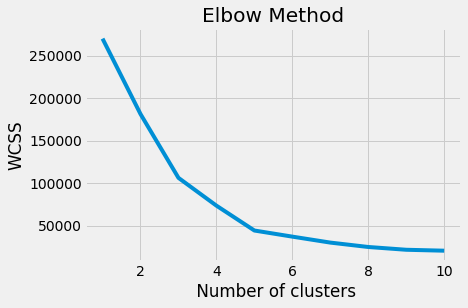

In [22]:
wcss = []
for i in range(1, 11) :
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel(' Number of clusters')
plt.ylabel('WCSS')
plt.show()

######Method 2 - Silhouette Coefficient

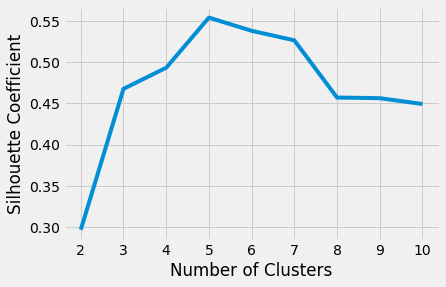

In [24]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient 
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#####5. Create Cluster

In [25]:
kmeans = KMeans(n_clusters=5, max_iter=500, n_init=10, random_state=0)
kmeans_preds = kmeans.fit_predict(X)

In [27]:
#predict result
kmeans_preds

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

#####6. Show Cluster

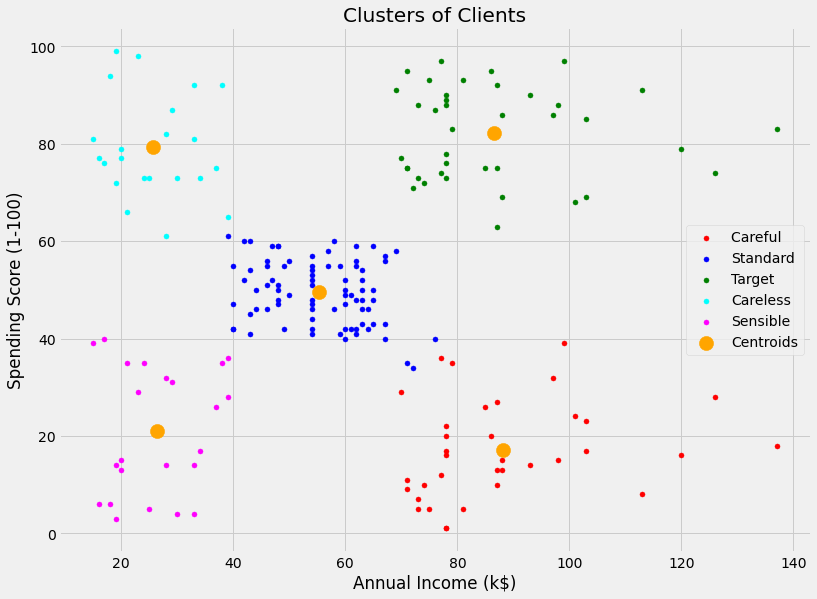

In [29]:
point_size = 25
colors = ['red', 'blue' ,'green', 'cyan', 'magenta']
labels = ['Careful ', 'Standard', 'Target', 'Careless', 'Sensible']
plt.figure(figsize = (12,9))
for i in range(5):
  plt.scatter(X[kmeans_preds == i, 0], X[kmeans_preds == i, 1], s = point_size, c = colors[i], label = labels[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'orange', label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()

In [30]:
#menambahkan hasil clustering ke dalam dataframe
df['Cluster'] = kmeans_preds
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [31]:
df.groupby(['Cluster'])['Cluster'].count()

Cluster
0    35
1    81
2    39
3    22
4    23
Name: Cluster, dtype: int64

In [32]:
#menampilkan cluster tertentu
df.loc[df['Cluster'] == 1].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
43,44,Female,31,39,61,1
46,47,Female,50,40,55,1
47,48,Female,27,40,47,1
48,49,Female,29,40,42,1
49,50,Female,31,40,42,1


In [33]:
#predict one data
print(kmeans.predict([[100, 20]]))

[0]


###Implementasi 3 - Multi Features Clustering

Menggunakan dataset yang sama, '**Mall_Customers.csv**', run ulang bagian '**Import Library**' dan '**Load Dataset**' pada '**Implementasl 2 - Mall Customer Segmentation**' apabila runtime habis

####1. Import Library

In [34]:
#menjalankan seluruh kode pada Implementasi 2 Mall Customer Segmentation apabil error karena runtime habis 
import plotly as py
import plotly.graph_objs as go

####2. Data preprocessing

#####Select Feature

In [35]:
X = np.array(df.iloc[:, [2, 3, 4]])

In [36]:
X[:5]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40]])

#####Determine Number of Clusters

######Method 1 - Elbow Method

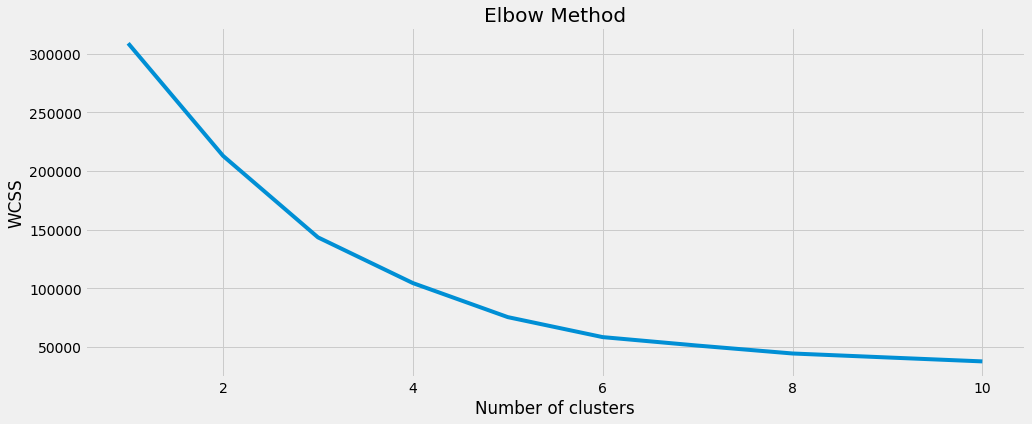

In [38]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

######Method 2 - Silhouette Coefficient

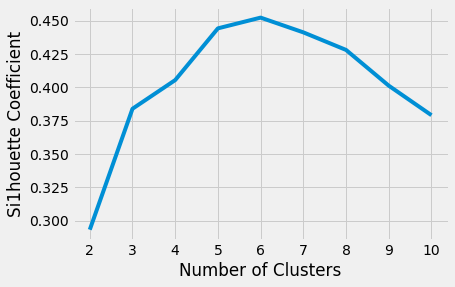

In [40]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient 
for k in range(2, 11) :
  kmeans = KMeans(n_clusters=k, init='k-means++' , max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use( "fivethirtyeight" )
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Si1houette Coefficient")
plt.show()

####3. Create Cluster

In [41]:
kmeans = KMeans(n_clusters = 6, max_iter = 500, n_init = 10, random_state = 0)
kmeans_preds = kmeans.fit_predict(X)

In [42]:
#predict result
kmeans_preds

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 1, 0,
       5, 4, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

####4. Show Cluster

In [46]:
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_

df['ClusterMultiFeatures'] = labels3
trace1 = go.Scatter3d( 
    x = df['Age'],
    y = df['Spending Score (1-100)'],
    z = df['Annual Income (k$)'],
    mode = 'markers',
    marker = dict(
      color	= df['ClusterMultiFeatures'],
      size = 20,
      line = dict(
          color = df['ClusterMultiFeatures'],
          width = 12
      ),
      opacity = 0.8
    )
)
data = [trace1]
layout = go.Layout(
    title = 'Clusters',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)

In [49]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,ClusterMu1tiFeatures,ClusterMultiFeatures
0,1,Male,19,15,39,4,5,5
1,2,Male,21,15,81,3,4,4
2,3,Female,20,16,6,4,5,5
3,4,Female,23,16,77,3,4,4
4,5,Female,31,17,40,4,5,5


In [48]:
df.groupby(['ClusterMultiFeatures'])['ClusterMultiFeatures'].count()

ClusterMultiFeatures
0    38
1    45
2    35
3    39
4    22
5    21
Name: ClusterMultiFeatures, dtype: int64

In [53]:
#menampilkan cluster tertentu
df.loc[df['ClusterMultiFeatures'] == 3].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,ClusterMu1tiFeatures,ClusterMultiFeatures
123,124,Male,39,69,91,2,3,3
125,126,Female,31,70,77,2,3,3
127,128,Male,40,71,95,2,3,3
129,130,Male,38,71,75,2,3,3
131,132,Male,39,71,75,2,3,3


In [54]:
#predict one data
print(kmeans.predict([[39, 80, 80]]))

[3]


##Clustering Evaluation?

While Classification and Regression tasks form what's called Supervised Learning, Clustering forms the majority of Unsupervised Learning tasks. The difference between these two macro-areas lies in the type of data used. While in Supervised Learning samples are labelled with either a categorical label (Classification) or a numerical value (Regression), in Unsupervised Learning samples are not labelled, making it a relatively complex task to perform and evaluate.

Correctly measuring the performance of Clustering algorithms is key. This is especially true as it often happens that clusters are manually and qualitatively inspected to determine whether the results are meaningful.

Another main metrics used to evaluate the performance of Clustering algorithms are :
* Silhouette Score
* Rand Index
* Adjusted Rand Index   Mutual Information
* Calinski-Harabasz Index
* Davies-Bouldin Index


##TUGAS 😸

Lakukan Clustering dengan menggunakan dataset iris dari sklearn.datasets (dapat dilihat pada kode di bawah), gunakan referensi 'Implementasi 2 dan 3' di atas kemudian sesuaikan kodenya

Hasil model clustering dalam bentuk plot scatter dan kolom baru dengan nama 'cluster'

In [55]:
#iris dataset
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df. head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##References:

https://towardsdatascience.com/machine-learning-algorithm-part-9-k-means-example-in-python-f2ad05ed5203

https://realpython.com/k-means-clusteringnython/

https://www.dqlab.id/k-means-clustering-salah-satu-contoh-teknik-analisis-data-upuler

https://blog.rosihanari.net/tutorial-k-means-clustering-dengan-python 

https://towardsdatascience.com/three-oerformance-evaluation-metrics-of-clusterina-when-around-truth-labels-are-not-available-ee08cb3ff4fb

https://towardsdatascience.com/performance-metrics-in-machine-learning:part-3-clustering-d69550662dc6

https://socs.binus.ac.id/2017/03/09/clustering/

https://www.dqlab.id/k-means-clustering-salah-satu-contoh-teknik-analisis-data-upuler

#Nama  : Miftahudin Faiz
#NIM   : 20.11.3675
#Kelas : 20-S1-IF-07

###Implementasi 2 - Mall Customer Segmentation

####1. Import Library

In [57]:
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Determine number of clusters
from sklearn.metrics import silhouette_score

####2. Load Dataset

In [117]:
#iris dataset
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df. head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


####3. EDA

In [59]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [61]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


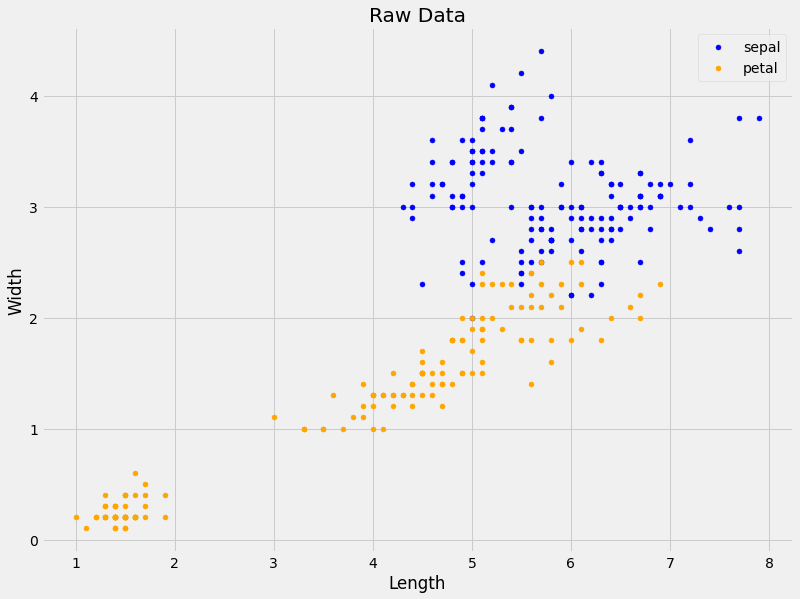

In [69]:
plt.figure(figsize=(12, 9))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], s=25, c = 'blue', label = 'sepal') #Point size is 25
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], s=25, c = 'orange', label = 'petal') #Point size is 25
plt.title('Raw Data')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

####4. Data preprocessing

#####Select Feature

In [118]:
X1 = np.array(df.iloc[:, [0, 1]]) #untuk sepal

In [119]:
X2 = np.array(df.iloc[:, [2, 3]]) #untuk petal

In [106]:
X1 

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [107]:
X2

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

#####Determine Number of Clusters

######Method 1 - Elbow Method

Di sini saya menggunakan Sepal

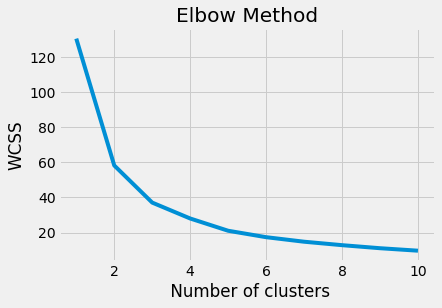

In [120]:
wcss = []
for i in range(1, 11) :
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel(' Number of clusters')
plt.ylabel('WCSS')
plt.show()

######Method 2 - Silhouette Coefficient

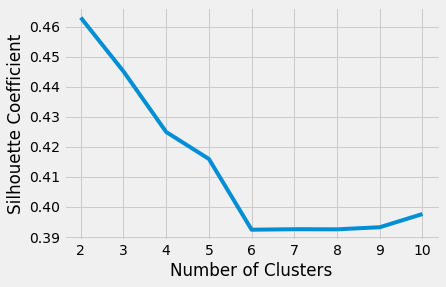

In [121]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient 
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X1)
  score = silhouette_score(X1, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#####5. Create Cluster

In [122]:
kmeans = KMeans(n_clusters=5, max_iter=500, n_init=10, random_state=0)
kmeans_preds = kmeans.fit_predict(X1)

In [123]:
#predict result
kmeans_preds

array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 4, 3, 3, 3, 1, 3, 1, 3, 0, 3, 0, 0, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 2, 3, 2,
       3, 3, 3, 1, 1, 3, 3, 2, 2, 1, 3, 1, 2, 1, 3, 2, 1, 1, 3, 2, 2, 2,
       3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1], dtype=int32)

#####6. Show Cluster

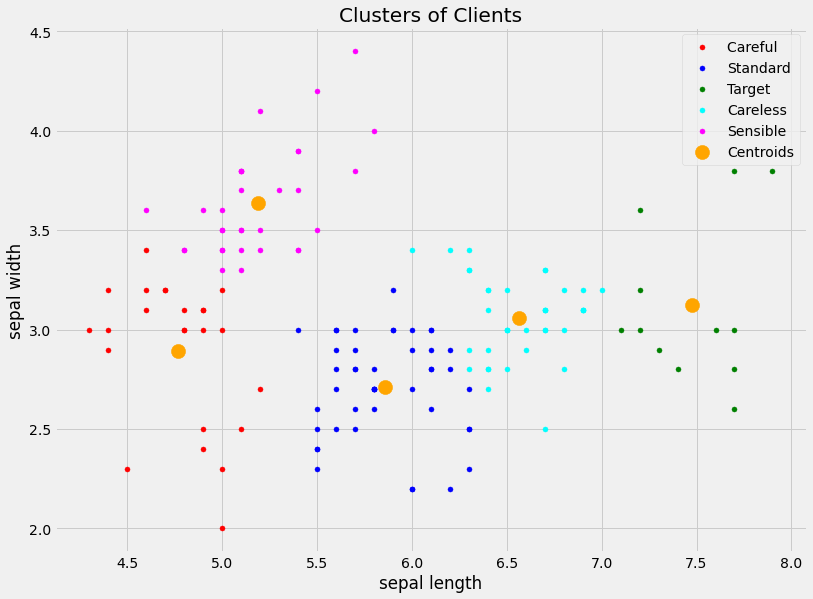

In [124]:
point_size = 25
colors = ['red', 'blue' ,'green', 'cyan', 'magenta']
labels = ['Careful ', 'Standard', 'Target', 'Careless', 'Sensible']
plt.figure(figsize = (12,9))
for i in range(5):
  plt.scatter(X1[kmeans_preds == i, 0], X1[kmeans_preds == i, 1], s = point_size, c = colors[i], label = labels[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'orange', label = 'Centroids')
plt.title('Clusters of Clients')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc = 'best')
plt.show()

In [125]:
#menambahkan hasil clustering ke dalam dataframe
df['Cluster'] = kmeans_preds
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,4
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,4


In [126]:
df.groupby(['Cluster'])['Cluster'].count()

Cluster
0    24
1    45
2    12
3    37
4    32
Name: Cluster, dtype: int64

In [127]:
#menampilkan cluster tertentu
df.loc[df['Cluster'] == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
53,5.5,2.3,4.0,1.3,1
55,5.7,2.8,4.5,1.3,1
61,5.9,3.0,4.2,1.5,1
62,6.0,2.2,4.0,1.0,1
63,6.1,2.9,4.7,1.4,1


In [128]:
#predict one data
print(kmeans.predict([[5.7, 2.8]]))

[1]


###Implementasi 3 - Multi Features Clustering

Menggunakan dataset yang sama, '**Mall_Customers.csv**', run ulang bagian '**Import Library**' dan '**Load Dataset**' pada '**Implementasl 2 - Mall Customer Segmentation**' apabila runtime habis

####1. Import Library

In [129]:
#menjalankan seluruh kode pada Implementasi 2 Mall Customer Segmentation apabil error karena runtime habis 
import plotly as py
import plotly.graph_objs as go

####2. Data preprocessing

#####Select Feature

In [131]:
X = np.array(df.iloc[:, [0, 1, 2]])

In [132]:
X[:5]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

#####Determine Number of Clusters

######Method 1 - Elbow Method

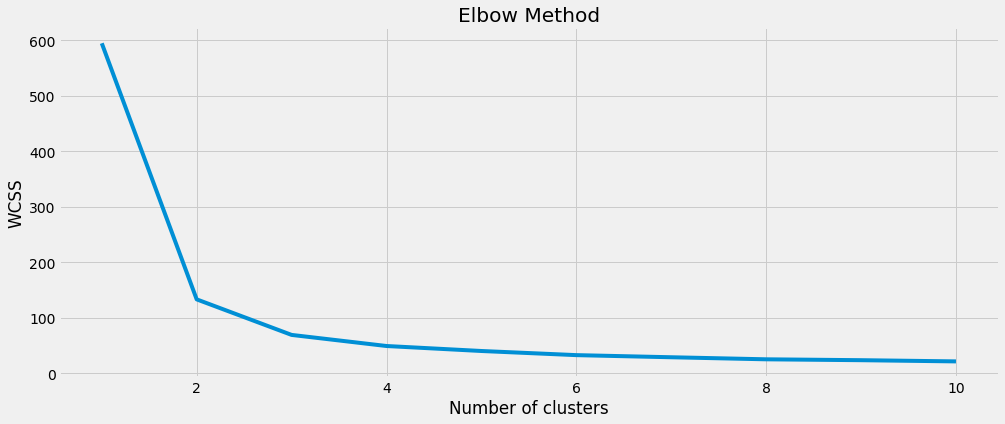

In [133]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

######Method 2 - Silhouette Coefficient

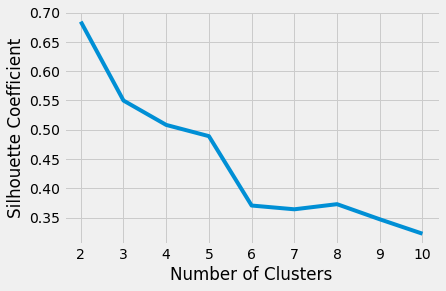

In [136]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient 
for k in range(2, 11) :
  kmeans = KMeans(n_clusters=k, init='k-means++' , max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use( "fivethirtyeight" )
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

####3. Create Cluster

In [137]:
kmeans = KMeans(n_clusters = 6, max_iter = 500, n_init = 10, random_state = 0)
kmeans_preds = kmeans.fit_predict(X)

In [138]:
#predict result
kmeans_preds

array([1, 5, 5, 5, 1, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 5, 0, 4, 0, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 0, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 0, 4, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 4, 4, 0, 0, 3, 3, 4, 0, 4, 3, 4, 0, 3, 4, 4, 0, 3, 3, 3,
       0, 4, 0, 3, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4], dtype=int32)

####4. Show Cluster

In [139]:
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_

df['ClusterMultiFeatures'] = labels3
trace1 = go.Scatter3d( 
    x = df['sepal length (cm)'],
    y = df['sepal width (cm)'],
    z = df['petal length (cm)'],
    mode = 'markers',
    marker = dict(
      color	= df['ClusterMultiFeatures'],
      size = 20,
      line = dict(
          color = df['ClusterMultiFeatures'],
          width = 12
      ),
      opacity = 0.8
    )
)
data = [trace1]
layout = go.Layout(
    title = 'Clusters',
    scene = dict(
        xaxis = dict(title = 'sepal length (cm)'),
        yaxis = dict(title = 'sepal width (cm)'),
        zaxis = dict(title = 'petal length (cm)')
    )
)
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)

In [140]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,ClusterMultiFeatures
0,5.1,3.5,1.4,0.2,4,1
1,4.9,3.0,1.4,0.2,0,5
2,4.7,3.2,1.3,0.2,0,5
3,4.6,3.1,1.5,0.2,0,5
4,5.0,3.6,1.4,0.2,4,1


In [141]:
df.groupby(['ClusterMultiFeatures'])['ClusterMultiFeatures'].count()

ClusterMultiFeatures
0    27
1    28
2    25
3    12
4    36
5    22
Name: ClusterMultiFeatures, dtype: int64

In [142]:
#menampilkan cluster tertentu
df.loc[df['ClusterMultiFeatures'] == 3].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,ClusterMultiFeatures
102,7.1,3.0,5.9,2.1,2,3
105,7.6,3.0,6.6,2.1,2,3
107,7.3,2.9,6.3,1.8,2,3
109,7.2,3.6,6.1,2.5,2,3
117,7.7,3.8,6.7,2.2,2,3


In [143]:
#predict one data
print(kmeans.predict([[7.3, 2.9, 6.3]]))

[3]
